In [26]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [35]:
cartella = r'../file/Data_Challenge_PHM2023_training_data/Pitting_degradation_level_0 (Healthy)'
#dentro deve prende e apri tutti i file, controllare il nome e a seconda di questo fare delle azioni e salvare su un altro file
# Inizializza un DataFrame vuoto per salvare i risultati
risultati = pd.DataFrame(columns=['acc_X', 'acc_Y', 'acc_Z', "tachimetro"])
codici_6sec = ["V300_", "V400_", "V500_", "V600_", "V700_", "V800_", "V900_", "V1000_"]

# Loop attraverso tutti i file nella cartella
for filename in os.listdir(cartella):
    # Costruisci il percorso completo del file
    percorso_file = os.path.join(cartella, filename)
    df = pd.read_csv(percorso_file, delim_whitespace=True, header=None)
    #tachimetro indica 1 quando albero di carico fa un giro
    nuovi_nomi_colonne = ['acc_X', 'acc_Y', 'acc_Z', "tachimetro"]
    df.columns = nuovi_nomi_colonne
    
    # Esegui azioni basate sul nome del file
    if "V100_" in filename or "V200_" in filename:
        # Esegui azioni specifiche per la condizione 1
        risultati = df[150000:210000]
    elif any(codice in filename for codice in codici_6sec):
        # Esegui azioni specifiche per la condizione 2
        risultati = df[40000:100000]
    else:
        # Esegui azioni predefinite per gli altri casi
        risultati = df[:60000]

    # Salva il DataFrame con i risultati su un nuovo file
    risultati.to_csv(f'../file_cut_training/Pitting_degradation_level_0 (Healthy)/{filename[:-4]}_cut.csv', index=False)

In [36]:
txt_file_path = r'../file/Data_Challenge_PHM2023_training_data/Pitting_degradation_level_0 (Healthy)/V400_50N_1.txt'

#Utilizza il separatore di default, che è lo spazio (' ') e non considerare la prima riga come nome colonne
df = pd.read_csv(txt_file_path, delim_whitespace=True, header=None)
#tachimetro indica 1 quando albero di carico fa un giro
nuovi_nomi_colonne = ['acc_X', 'acc_Y', 'acc_Z', "tachimetro"]
df.columns = nuovi_nomi_colonne

print(df)
print(df["tachimetro"].max())
print(df.where(df["tachimetro"] == 1.0).count())
result_df = df[df["tachimetro"] == 1.0]
print(result_df)


           acc_X     acc_Y     acc_Z  tachimetro
0      -0.239551 -0.064390 -0.224016         0.0
1      -0.071208  0.138668  0.037597         0.0
2      -0.108176  0.073336 -0.030849         0.0
3      -0.031758  0.066038  0.090378         0.0
4      -0.034984  0.037904  0.046273         0.0
...          ...       ...       ...         ...
123899 -0.076046 -0.018481  0.169067         0.0
123900 -0.121946 -0.193876 -0.034585         0.0
123901 -0.058926 -0.251792 -0.135567         0.0
123902  0.097880 -0.176572 -0.011448         0.0
123903  0.100733 -0.152558 -0.102067         0.0

[123904 rows x 4 columns]
1.0
acc_X         22
acc_Y         22
acc_Z         22
tachimetro    22
dtype: int64
           acc_X     acc_Y     acc_Z  tachimetro
4703   -0.079767 -0.086167 -0.011930         1.0
10236   0.074805 -0.016598  0.131108         1.0
15772  -0.136585 -0.005179  0.046755         1.0
21302  -0.001985  0.054737  0.029162         1.0
26833  -0.111526 -0.174924 -0.150750         1.0
32370 

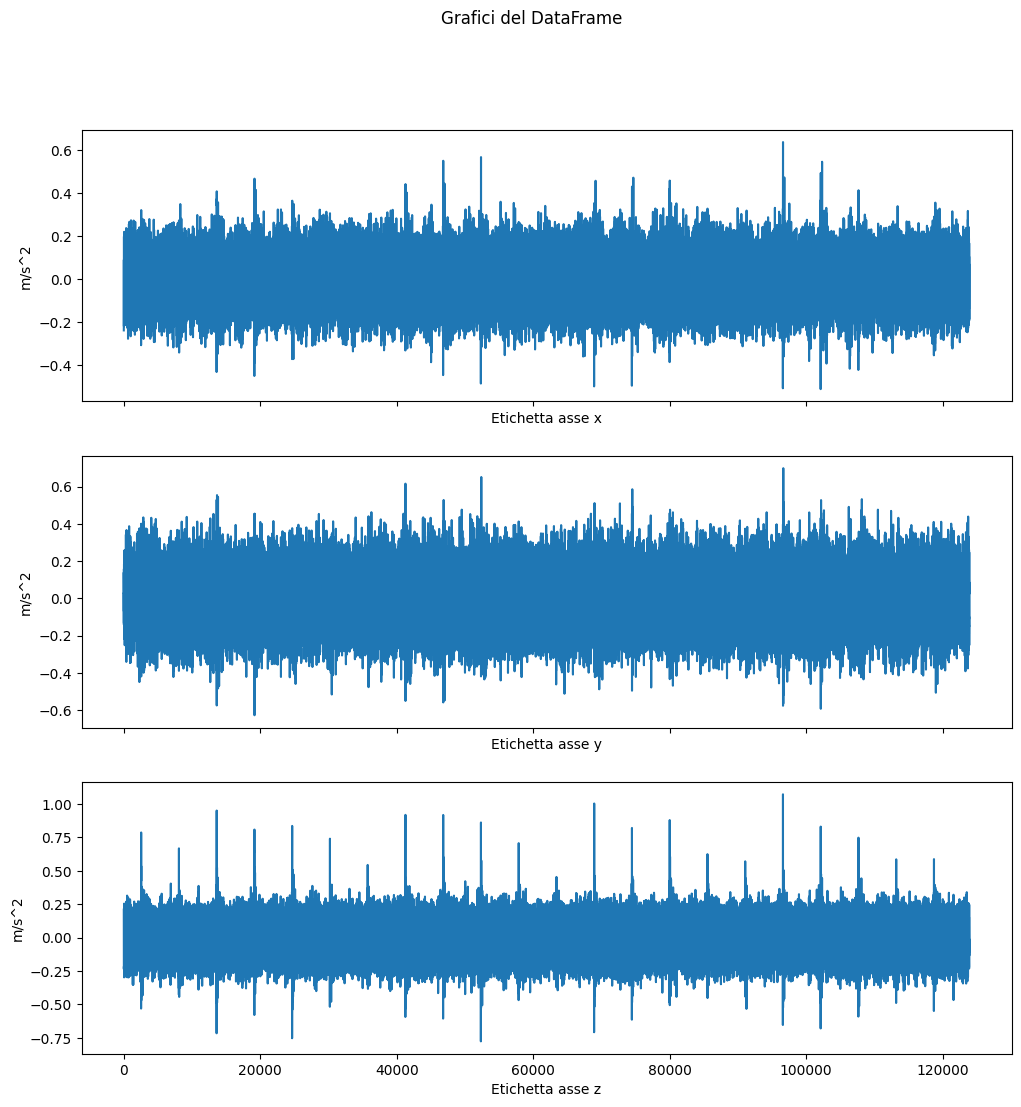

In [37]:
# Creare i sottografici
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 12))

# Tracciare i dati su ciascun sottografo
ax[0].plot(df['acc_X'])
ax[1].plot(df['acc_Y'])
ax[2].plot(df['acc_Z'])

# Aggiungere etichette e titoli
ax[0].set_xlabel('Etichetta asse x')
ax[1].set_xlabel('Etichetta asse y')
ax[2].set_xlabel('Etichetta asse z')
ax[0].set_ylabel('m/s^2')
ax[1].set_ylabel('m/s^2')
ax[2].set_ylabel('m/s^2')
fig.suptitle('Grafici del DataFrame')

# Mostrare il grafico
plt.show()